<h1 style="color:#8B66FF;">Question 1</h1>
<h2 style="color:#659FFF;">K-means</h2>
This is the implementation of k-means algorithm for image clustering. First I start by reading the
sample points from a file(Points.txt):

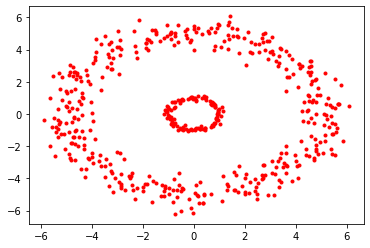

In [11]:
from matplotlib import pyplot as plt
import numpy as np

def readPoints():
    # read the points from file:
    with open("../images/Points.txt", "r") as file:
        n = int(file.readline())
        x, y = np.zeros((n, 1), dtype=float), np.zeros((n, 1), dtype=float)
        lines = file.readlines()[0:]
        for i in range(len(lines)):
            values = lines[i].split()
            x[i], y[i] = float(values[0]), float(values[1])

    file.close()
    plt.plot(x, y, 'r.')
    plt.savefig("../results/res01.jpg")
    return x, y, n

In this example we can see that we have 2 clusters. Hence, we set k to be equal to 2.
<br>
In the first step, we start by guessing k random cluster center locations.

Then we continue by finding the closest center to each data point. I did this with the function below.
It basically calculates the distance between each cluster center and the data point(x, y) and returns the one
with the minimum distance.

In [ ]:
def assign_cluster(x1, y1, k, clusters_x, clusters_y):
    min_distance, cluster = None, 0
    for i in range(k):
        distance = calculate_distance(x1, y1, clusters_x[i], clusters_y[i])
        if min_distance is None or distance < min_distance:
            min_distance, cluster = distance, i

    return cluster

In [ ]:
def calculate_distance(x1, y1, x2, y2):
    return np.power(x1 - x2, 2) + np.power(y1 - y2, 2)

After finding the best match for each data point, I continued by updating the center of each cluster to the
mean value of the points it owns. Then I repeated this process until the centers did not change.

In [ ]:

import random


def K_means(x, y, n, img_num, convert=False):
    # first choose k random points:
    k = 2
    centers_change = True
    clusters_index = random.sample(range(0, n), k)
    clusters_x, clusters_y = x[clusters_index], y[clusters_index]
    # then iterate until the centers get fixed
    while centers_change:
        clusters = np.ndarray((n, 1), dtype=int)
        for i in range(n):
            clusters[i] = assign_cluster(x[i], y[i], k, clusters_x, clusters_y)
        prev_centers_x, prev_centers_y = clusters_x.copy(), clusters_y.copy()
        if np.array_equal(prev_centers_x, clusters_x) and np.array_equal(prev_centers_y, clusters_y):
            centers_change = False
            # check if it was in the polar space
            if convert:
                x, y = convert_to_scalar(x, y)
            for cluster_num in range(k):
                xx = x[clusters == cluster_num]
                yy = y[clusters == cluster_num]
                clusters_x[cluster_num] = np.mean(xx, axis=0)
                clusters_y[cluster_num] = np.mean(yy, axis=0)
                plt.plot(xx, yy, '.')
        plt.savefig("../results/res0" + str(img_num) + ".jpg")
        plt.show()

def convert_to_scalar(r, theta):
    return r * np.cos(theta), r * np.sin(theta)

I did this two times for the points in scalar space.

In [ ]:
x, y, n = readPoints()
K_means(x, y, n, 2)
K_means(x, y, n, 3)

I also wanted to try this in another space. i went with the polar space and used simple formulas to conver x and y to r and theta.

In [ ]:
r, theta = np.sqrt(np.power(x, 2) + np.power(y, 2)), np.arctan2(y, x)
K_means(r, theta, n, 4, convert=True)